In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# A. preg = Number of times pregnant
# B. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# C. pres = Diastolic blood pressure (mm Hg)
# D. skin = Triceps skin fold thickness (mm)
# E. test = 2-Hour serum insulin (mu U/ml)
# F. mass = Body mass index (weight in kg/(height in m)^2)
# g. pedi = Diabetes pedigree function
# H. age = Age (years)
# I. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [3]:
# Reading data
columns = ["pregnant", "glucode", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=columns)
data

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Splitting data into train and test
features = ["pregnant", "glucode", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
X = data[features]
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [5]:
X_train

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
223,7,142,60,33,190,28.8,0.687,61
203,2,99,70,16,44,20.4,0.235,27
112,1,89,76,34,37,31.2,0.192,23
507,1,130,60,23,170,28.6,0.692,21
577,2,118,80,0,0,42.9,0.693,21
...,...,...,...,...,...,...,...,...
440,0,189,104,25,0,34.3,0.435,41
165,6,104,74,18,156,29.9,0.722,41
7,10,115,0,0,0,35.3,0.134,29
219,5,112,66,0,0,37.8,0.261,41


# Q1.Fisher's Linear discriminant function

Fisher's Linear discriminant function: y_i = W*x_i

Where <br>
W = S^-1 * (m1-m2); S = S1 + S2

m1 = mean data of class 1 <br>
m2 = mean data of class 2 <br>

S1 = scatter matrix for class 1 <br>
S2 = scatter matrix for class 2 <br>

S = within scatter matrix


Here I am taking 80% data as test data to calculate the cut, and then apply it on the test data to find the accuracy

In [6]:
# Collecting train data which are label 1 ans label 0 seperately
data_positive = X[Y==1]
data_negative = X[Y==0]

In [7]:
data_positive

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [8]:
data_negative

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,0,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [9]:
# Calculating mean of the positive and negative data after converting the data into numpy array
data_pos = np.array(data_positive)
data_neg = np.array(data_negative)

# print(data_pos, "\n", data_neg)

data_pos_mean = np.mean(data_pos, 0)
data_neg_mean = np.mean(data_neg, 0)

print("positive_mean: ", end="")
print(data_pos_mean)
print("negative_mean: ", end="")
print(data_neg_mean)

positive_mean: [  4.86567164 141.25746269  70.82462687  22.1641791  100.3358209
  35.14253731   0.5505      37.06716418]
negative_mean: [  3.298    109.98      68.184     19.664     68.792     30.3042
   0.429734  31.19    ]


In [10]:
# Calculating scatter matrices

S_positive = len(data_pos)*np.cov(data_pos.T)
print("Scatter for Class positive: ")
print(S_positive)

S_negative = len(data_neg)*np.cov(data_neg.T)
print("Scatter for Class negative: ")
print(S_negative)

Scatter for Class positive: 
[[ 3.75116105e+03 -1.74825468e+03  2.73589513e+03 -1.40332584e+03
  -1.09246742e+04 -1.15839101e+03 -2.58333933e+01  4.89367790e+03]
 [-1.74825468e+03  2.73397375e+05  1.26382584e+04  5.69291386e+03
   3.10283603e+05  3.13446067e+03  8.43803521e+01  9.25389513e+03]
 [ 2.73589513e+03  1.26382584e+04  1.23788655e+05  2.29373034e+04
   7.13881573e+04  5.60360824e+03  7.40397678e+01  1.65950787e+04]
 [-1.40332584e+03  5.69291386e+03  2.29373034e+04  8.37693483e+04
   3.00018697e+05  1.07388989e+04  4.83235116e+02 -4.78179775e+03]
 [-1.09246742e+04  3.10283603e+05  7.13881573e+04  3.00018697e+05
   5.15489245e+06  1.48777858e+04  1.40565197e+03  9.76137828e+03]
 [-1.15839101e+03  3.13446067e+03  5.60360824e+03  1.07388989e+04
   1.48777858e+04  1.41371858e+04  9.91211551e+01 -4.01394307e+03]
 [-2.58333933e+01  8.43803521e+01  7.40397678e+01  4.83235116e+02
   1.40565197e+03  9.91211551e+01  3.71576269e+01 -9.64488839e+01]
 [ 4.89367790e+03  9.25389513e+03  1.659

In [11]:
# Total Scatter matrix
S_total = S_positive + S_negative
print("With in scatter matrix: ")
print(S_total)

With in scatter matrix: 
[[ 8.30286245e+03  2.14350885e+03  6.36273281e+03 -4.06157835e+03
  -3.06100529e+04 -9.67034097e+02 -6.19069063e+01  1.49755316e+04]
 [ 2.14350885e+03  6.15078537e+05  5.81561342e+04  8.80978761e+03
   7.66384725e+05  1.63766871e+04  4.57898729e+02  4.40273420e+04]
 [ 6.36273281e+03  5.81561342e+04  2.86926002e+05  4.80945298e+04
   1.38022562e+05  3.08267682e+04  1.47759680e+02  3.92188462e+04]
 [-4.06157835e+03  8.80978761e+03  4.80945298e+04  1.94624611e+05
   6.03852420e+05  3.58494255e+04  6.95173304e+02 -1.90093328e+04]
 [-3.06100529e+04  7.66384725e+05  1.38022562e+05  6.03852420e+05
   1.00420652e+07  1.11507382e+05  4.76744790e+03 -7.63110065e+04]
 [-9.67034097e+02  1.63766871e+04  3.08267682e+04  3.58494255e+04
   1.11507382e+05  4.37041208e+04  1.80382436e+02 -2.39580580e+03]
 [-6.19069063e+01  4.57898729e+02  1.47759680e+02  6.95173304e+02
   4.76744790e+03  1.80382436e+02  8.18836365e+01 -2.37512186e+01]
 [ 1.49755316e+04  4.40273420e+04  3.9218846

In [12]:
S_inv = inv(S_total)
print("Scatter Inverse: ")
print(S_inv)

Scatter Inverse: 
[[ 1.67315043e-04  9.03079759e-07 -8.16107578e-07 -7.35758346e-08
   2.01011963e-07  1.70815608e-06  1.00868134e-04 -2.48529704e-05]
 [ 9.03079759e-07  1.93949138e-06 -2.28829457e-07  5.59649608e-07
  -1.74719698e-07 -5.96540390e-07 -3.28691052e-06 -9.38528225e-07]
 [-8.16107578e-07 -2.28829457e-07  4.14611397e-06 -8.34304938e-07
   2.00798023e-08 -2.32666605e-06  3.75731169e-06 -1.59629735e-06]
 [-7.35758346e-08  5.59649608e-07 -8.34304938e-07  7.70240622e-06
  -4.19007517e-07 -4.67860721e-06 -3.20463935e-05  1.11311934e-06]
 [ 2.01011963e-07 -1.74719698e-07  2.00798023e-08 -4.19007517e-07
   1.39994230e-07  6.08419571e-08 -3.61545063e-06  6.65211724e-08]
 [ 1.70815608e-06 -5.96540390e-07 -2.32666605e-06 -4.67860721e-06
   6.08419571e-08  2.85806761e-05 -1.77380809e-05  7.54583127e-07]
 [ 1.00868134e-04 -3.28691052e-06  3.75731169e-06 -3.20463935e-05
  -3.61545063e-06 -1.77380809e-05  1.28157764e-02 -2.12981972e-05]
 [-2.48529704e-05 -9.38528225e-07 -1.59629735e-06  

In [13]:
# Calculating the weight vector
W = np.matmul(S_inv, (data_pos_mean-data_neg_mean))
print("Weight vector: ")
print(W)

Weight vector: 
[ 1.68923878e-04  4.85626509e-05 -1.91259129e-05  1.26147647e-06
 -1.47957951e-06  1.08673136e-04  1.20779093e-03  2.15293410e-05]


In [14]:
data_projected = []
for i in range(len(X)):
    data_projected.append(np.matmul(W.T, X.iloc[i]))

print(len(data_projected))

768


Classification using FDA(Extra)

In [15]:
data_pos_proj = np.matmul(W.T, data_pos_mean)
data_neg_proj = np.matmul(W.T, data_neg_mean)
seperation_boundary = 0.5*(data_pos_proj+data_neg_proj)
print("Positive data projection: " + str(data_pos_proj) + "\nNegative data projection: " + str(data_neg_proj) + \
      "\nSeperation boundary     : " + str(seperation_boundary))

Positive data projection: 0.011488654369218082
Negative data projection: 0.009000753924952719
Seperation boundary     : 0.0102447041470854


In [16]:
# Function to predict class in test data
def predict_class(features):
    estimated_proj = np.matmul(W.T, features)
    
    if(estimated_proj<seperation_boundary):
        return 0
    else:
        return 1

In [17]:
# Predicting the test data class
Y_pred = []
for i in range(len(X_test)):
    Y_pred.append(predict_class(np.array(X_test.iloc[i])))

In [18]:
print("Accuracy:",((Y_pred==Y_test).sum())/len(Y_pred))

Accuracy: 0.7597402597402597


# Q2.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics

In [20]:
model = DTC(criterion="entropy", max_depth=3)

model = model.fit(X_train, Y_train)

Y_pred_DTC = model.predict(X_test)

In [21]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_DTC))

Accuracy:  0.7792207792207793


In [22]:
# pip install pydotplus

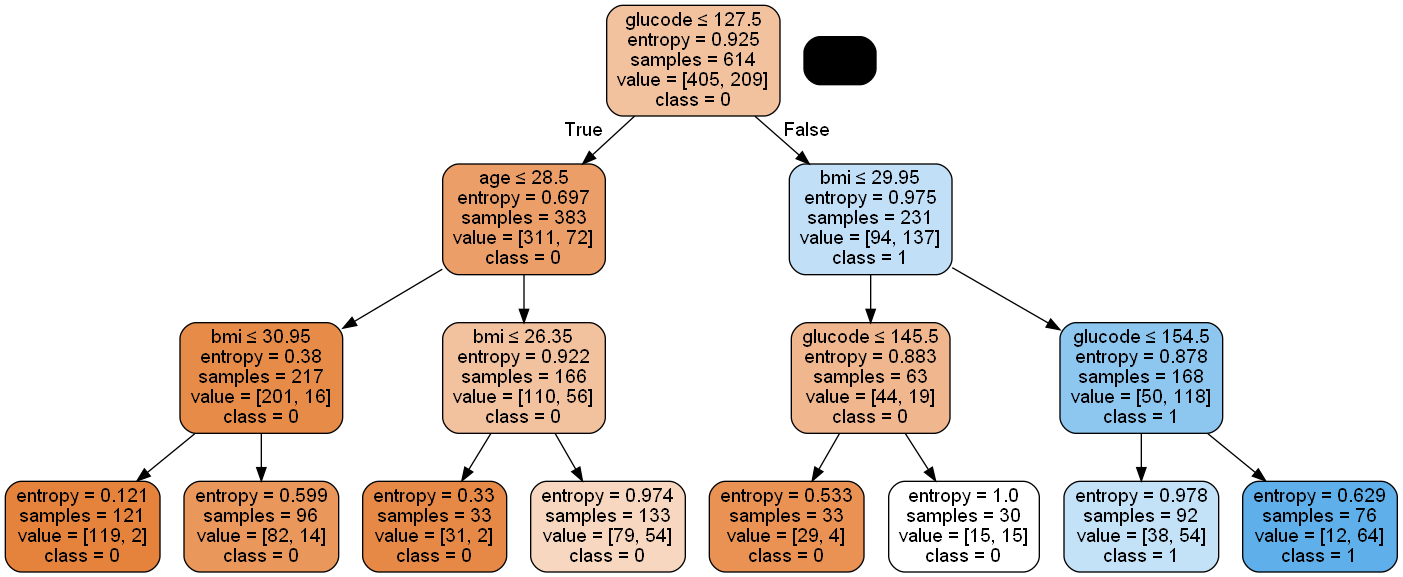

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names = features, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

# Q3. FDA with DTC

In [24]:
data_projected = np.array(data_projected)

In [25]:
data_projected = data_projected.reshape(-1, 1)
data_projected.shape

(768, 1)

In [26]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data_projected, Y, test_size=0.2, random_state=40)

model = DTC(criterion="entropy", max_depth=3)

model = model.fit(X_train1, Y_train1)

Y_pred_DTC_with_FDA = model.predict(X_test1)

In [27]:
print("Accuracy: ", metrics.accuracy_score(Y_test1, Y_pred_DTC_with_FDA))

Accuracy:  0.7142857142857143


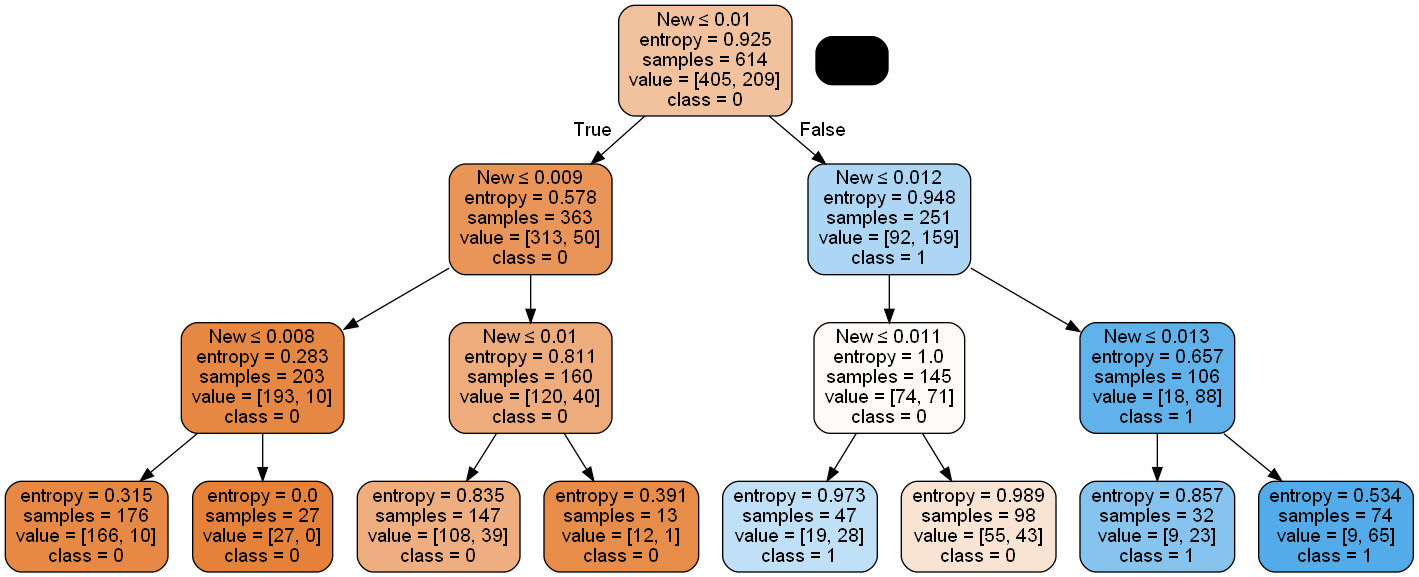

In [28]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names = ['New'], class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree_with_fda.png')
Image(graph.create_png())

DTC with FDA features is performing poor with accuracy 71.42 when compared to DTC with all the features with accuracy 77.92, may be the reason with the number of features to grow the tree